In [ ]:
import pandas as pd

calendar_df = pd.read_csv("/content/calendar(1).csv", dtype={'price': str})
listings_df = pd.read_csv("/content/listings (1) .csv")
reviews_df = pd.read_csv("/content/reviews(1).csv")

<ipython-input-1-852c071d2dda>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_df = pd.read_csv("/content/calendar(1).csv", dtype={'price': str})


In [ ]:
print("Calendar:", calendar_df.shape)
print("Listings:", listings_df.shape)
print("Reviews:", reviews_df.shape)

Calendar: (13661894, 7)
Listings: (37434, 79)
Reviews: (970919, 6)


In [ ]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2025-03-03,t,$225.00,NaN,30.0,1125.0
1,2595,2025-03-04,t,$225.00,NaN,30.0,1125.0
2,2595,2025-03-05,t,$225.00,NaN,30.0,1125.0
3,2595,2025-03-06,t,$225.00,NaN,30.0,1125.0
4,2595,2025-03-07,t,$225.00,NaN,30.0,1125.0


In [ ]:
calendar_df.date.min()

'2025-03-02'

In [ ]:
calendar_df.date.max()

'2026-03-02'

In [ ]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121,https://www.airbnb.com/rooms/36121,20250301213336,2025-03-03,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,https://a0.muscache.com/pictures/8776354/35b32...,62165,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647,https://www.airbnb.com/rooms/36647,20250301213336,2025-03-03,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",https://a0.muscache.com/pictures/miso/Hosting-...,157798,...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663,https://www.airbnb.com/rooms/38663,20250301213336,2025-03-02,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",https://a0.muscache.com/pictures/miso/Hosting-...,165789,...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,38833,https://www.airbnb.com/rooms/38833,20250301213336,2025-03-03,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,https://a0.muscache.com/pictures/7554f9e5-4ab0...,166532,...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,39282,https://www.airbnb.com/rooms/39282,20250301213336,2025-03-02,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,https://a0.muscache.com/pictures/ef8f43ad-d967...,168525,...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54


In [ ]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [ ]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')
if 'price' in calendar_df.columns:
    calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

if 'price' in listings_df.columns:
    listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)
print("Missing values in listings:")
display(listings_df.isnull().sum().sort_values(ascending=False).head(10))

print("Missing values in calendar:")
display(calendar_df.isnull().sum().sort_values(ascending=False).head(10))

print("Missing values in reviews:")
display(reviews_df.isnull().sum().sort_values(ascending=False).head(10))

Missing values in listings:


,0
calendar_updated,37434
license,32065
neighborhood_overview,17210
neighbourhood,17209
host_response_time,16148
host_response_rate,16148
host_about,15979
estimated_revenue_l365d,15126
price,15126
beds,15082


Missing values in calendar:


,0
adjusted_price,13661164
minimum_nights,3
maximum_nights,3
available,0
date,0
listing_id,0
price,0


Missing values in reviews:


,0
comments,241
reviewer_name,3
id,0
listing_id,0
reviewer_id,0
date,0


In [ ]:
# Drop columns with too many missing values
listings_df.drop(columns=['calendar_updated', 'license'], inplace=True)

# Fill neighborhood-related text columns
listings_df['neighbourhood'] = listings_df['neighbourhood'].fillna('Unknown')
listings_df['neighborhood_overview'].fillna('None provided', inplace=True)

# Host response info
listings_df['host_response_time'].fillna('unknown', inplace=True)
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.replace('%','').astype(float)
listings_df['host_response_rate'].fillna(listings_df['host_response_rate'].median(), inplace=True)

# Fill numeric columns
listings_df['beds'].fillna(listings_df['beds'].median(), inplace=True)
listings_df.dropna(subset=['price'], inplace=True)

# Drop unused calendar column
calendar_df.drop(columns=['adjusted_price'], inplace=True)

# Drop review rows without comment text
reviews_df.dropna(subset=['comments'], inplace=True)
reviews_df['reviewer_name'].fillna('Anonymous', inplace=True)

<ipython-input-9-8e8c4ed60e74>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['neighborhood_overview'].fillna('None provided', inplace=True)
<ipython-input-9-8e8c4ed60e74>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
print("Listings:", listings_df.shape)
print("Calendar:", calendar_df.shape)
print("Reviews:", reviews_df.shape)

Listings: (22308, 77)
Calendar: (13661894, 6)
Reviews: (970678, 6)


In [ ]:
print(listings_df.info())
print(listings_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 22308 entries, 0 to 37433
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22308 non-null  int64  
 1   listing_url                                   22308 non-null  object 
 2   scrape_id                                     22308 non-null  int64  
 3   last_scraped                                  22308 non-null  object 
 4   source                                        22308 non-null  object 
 5   name                                          22308 non-null  object 
 6   description                                   21903 non-null  object 
 7   neighborhood_overview                         22308 non-null  object 
 8   picture_url                                   22308 non-null  object 
 9   host_id                                       22308 non-null  int6

In [ ]:
print(calendar_df.info())
print(calendar_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13661894 entries, 0 to 13661893
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   minimum_nights  float64       
 5   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 625.4+ MB
None
         listing_id                           date         price  \
count  1.366189e+07                       13661894  1.366189e+07   
mean   4.276909e+17  2025-08-31 12:20:57.856399872  3.817375e+02   
min    2.595000e+03            2025-03-02 00:00:00  0.000000e+00   
25%    2.129595e+07            2025-06-01 00:00:00  7.900000e+01   
50%    5.018130e+07            2025-09-01 00:00:00  1.330000e+02   
75%    9.121909e+17            2025-12-01 00:00:00  2.290000e+02   
max    1.366913e+18            202

In [ ]:
print(reviews_df.info())
print(reviews_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 970678 entries, 0 to 970918
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     970678 non-null  int64         
 1   id             970678 non-null  int64         
 2   date           970678 non-null  datetime64[ns]
 3   reviewer_id    970678 non-null  int64         
 4   reviewer_name  970678 non-null  object        
 5   comments       970678 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 51.8+ MB
None
         listing_id            id                           date   reviewer_id
count  9.706780e+05  9.706780e+05                         970678  9.706780e+05
mean   1.719663e+17  5.035633e+17  2021-03-15 10:29:01.998891520  1.632223e+08
min    2.595000e+03  3.149000e+03            2009-05-25 00:00:00  1.000000e+00
25%    1.003419e+07  4.032631e+08            2019-01-20 00:00:00  3.176934e+07
50%    2.

In [ ]:
print("Duplicate listings:", listings_df.duplicated().sum())
print("Duplicate calendar entries:", calendar_df.duplicated().sum())
print("Duplicate reviews:", reviews_df.duplicated().sum())

# Remove duplicates if needed
listings_df = listings_df.drop_duplicates()
calendar_df = calendar_df.drop_duplicates()
reviews_df = reviews_df.drop_duplicates()

Duplicate listings: 0
Duplicate calendar entries: 0
Duplicate reviews: 0


## **EDA**

Box plot


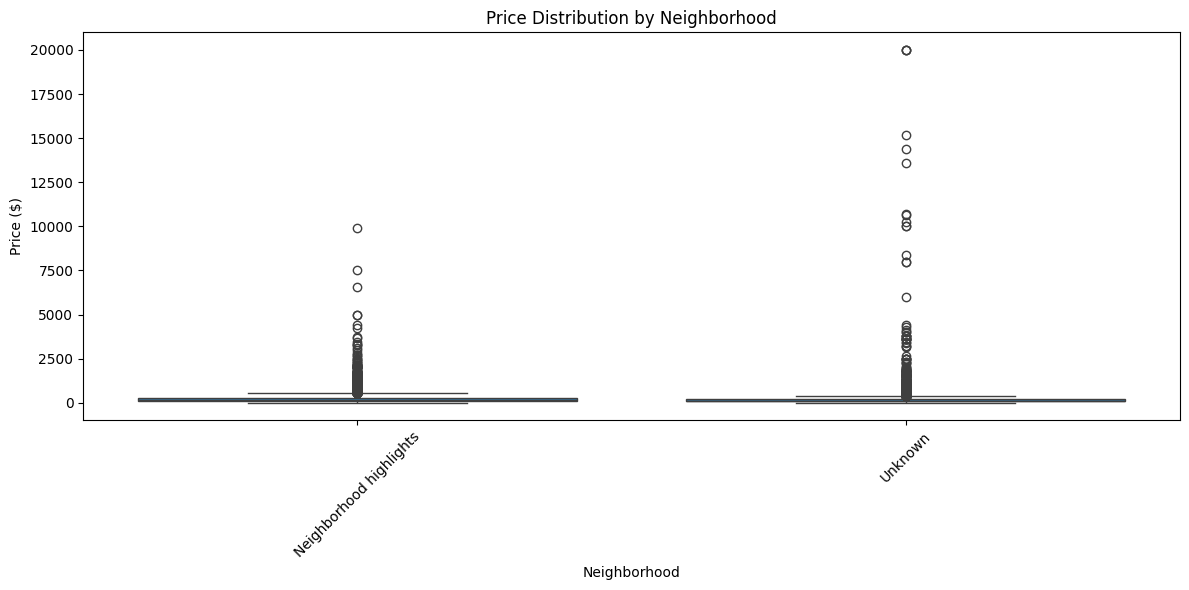

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=listings_df, x='neighbourhood', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Neighborhood')
plt.ylabel('Price ($)')
plt.xlabel('Neighborhood')
plt.tight_layout()
plt.show()

Distribution Plots

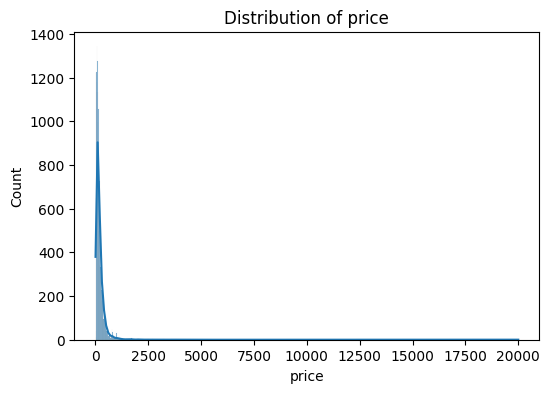

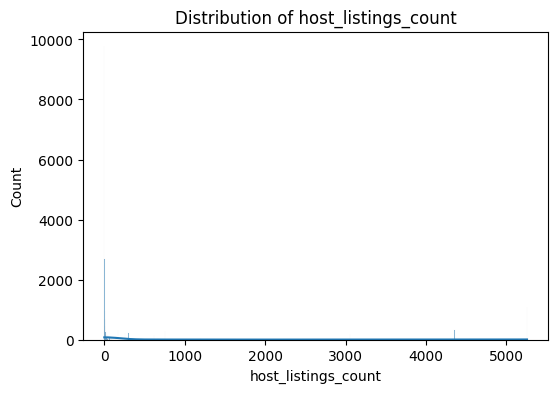

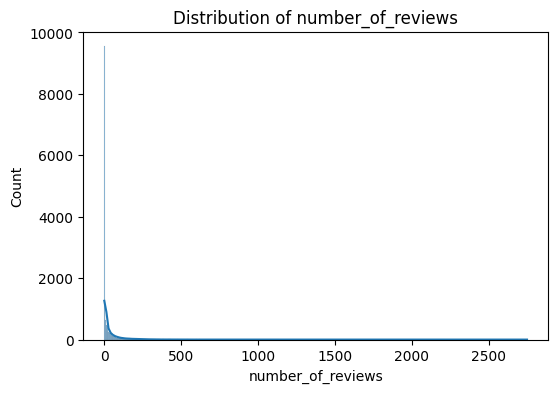

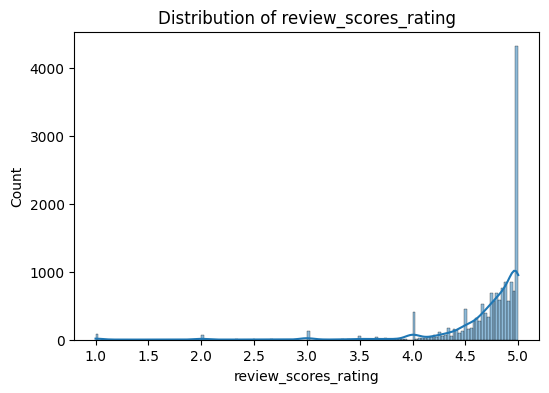

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['price', 'host_listings_count', 'number_of_reviews', 'review_scores_rating']
for col in numeric_cols:
    if col in listings_df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(listings_df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()



Correlation Matrix

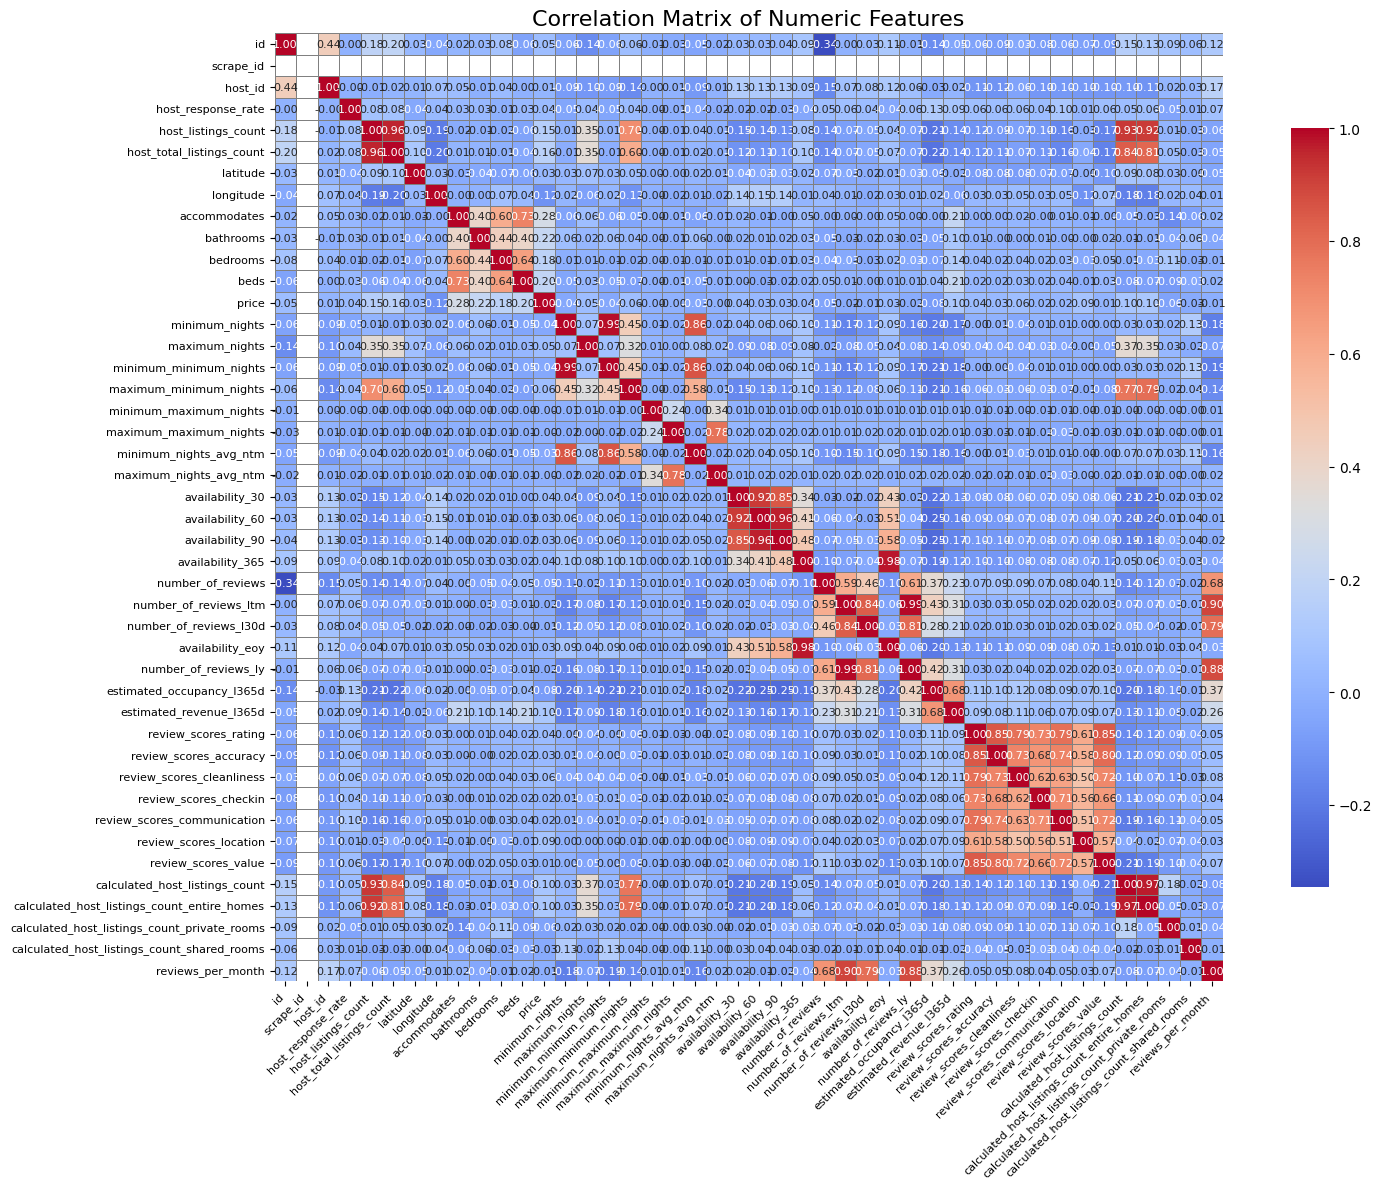

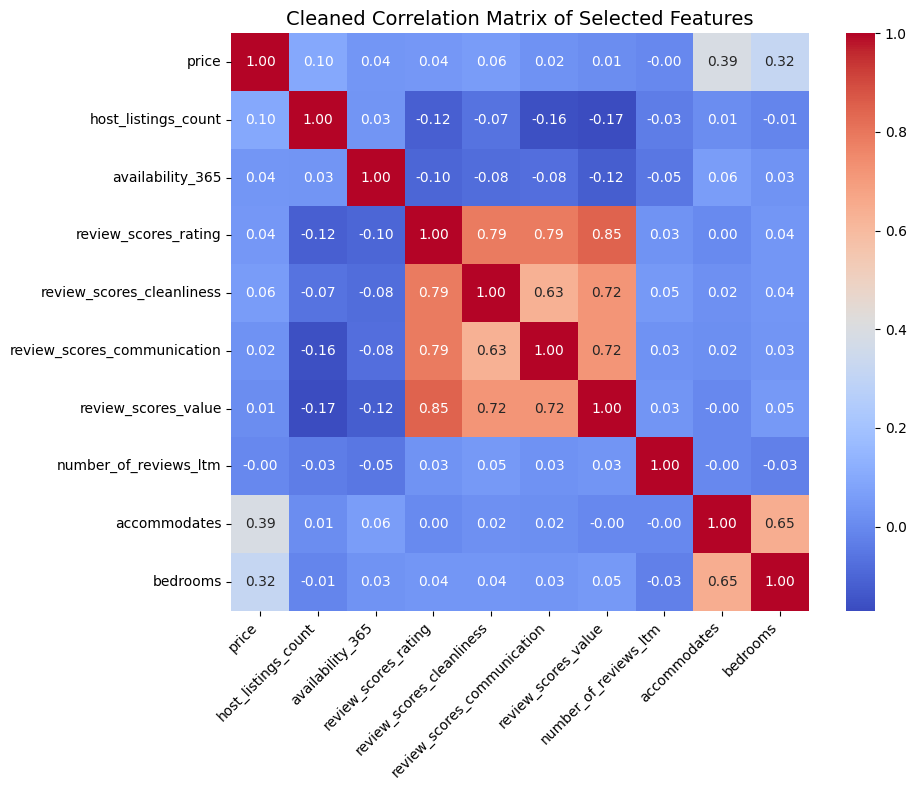

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))  # Larger size
corr_matrix = listings_df.select_dtypes(include=['float64', 'int']).corr()

sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            annot_kws={"size": 8},  # Smaller text
            linewidths=0.5,         # Adds gridlines for clarity
            linecolor='grey',
            square=True,
            cbar_kws={"shrink": 0.8})  # Smaller colorbar

plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


selected_cols = [
    'price', 'host_listings_count', 'availability_365',
    'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_value', 'number_of_reviews_ltm',
    'accommodates', 'bedrooms'
]

# Drop NA just for visualization
corr_data = listings_df[selected_cols].dropna()

# Generate correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Cleaned Correlation Matrix of Selected Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Geospatial Distribution of Listings

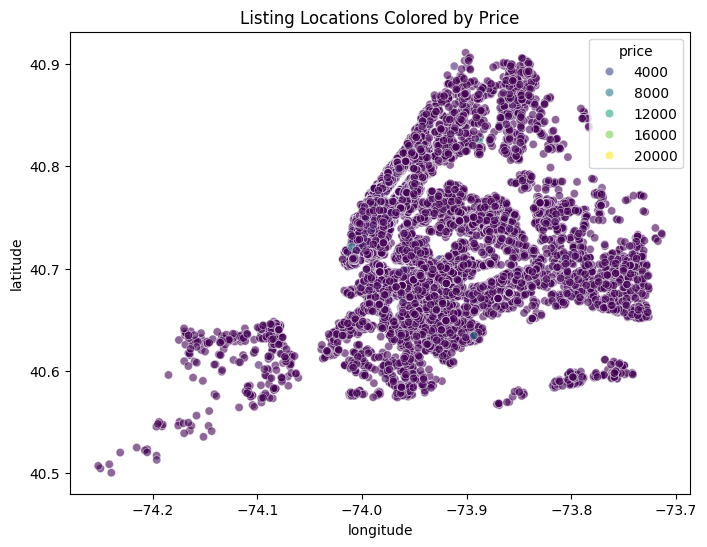

In [ ]:
if 'latitude' in listings_df.columns and 'longitude' in listings_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=listings_df, x='longitude', y='latitude', hue='price', palette='viridis', alpha=0.6)
    plt.title("Listing Locations Colored by Price")
    plt.show()

# 2. Feature Selection for Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop ID-type columns
features = listings_df.select_dtypes(include=['float64', 'int']).drop(columns=['id', 'host_id'], errors='ignore')

# Drop any remaining NA values
features = features.dropna()

# Save index for mapping results back
features_index = features.index

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


### Isolation Forest for Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit and predict
preds = iso_forest.fit_predict(X_scaled)

# Add results to the original DataFrame
listings_df.loc[features_index, 'anomaly_score_iso'] = preds
listings_df['is_anomaly_iso'] = listings_df['anomaly_score_iso'].apply(lambda x: 1 if x == -1 else 0)

In [ ]:
# View some anomalous listings
anomalies = listings_df[listings_df['is_anomaly_iso'] == 1]
print("Anomalous Listings Detected:", anomalies.shape[0])
display(anomalies[['price', 'host_listings_count', 'availability_365', 'number_of_reviews']].head())

Anomalous Listings Detected: 774


,price,host_listings_count,availability_365,number_of_reviews
611,500.0,1.0,213,283
1230,184.0,3.0,365,81
1241,140.0,17.0,232,26
1285,50.0,2.0,226,5
1384,2029.0,1.0,179,13


In [ ]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 7.1 MB/s eta 0:00:00


In [ ]:
import folium
from folium.plugins import HeatMap

map_center = [listings_df['latitude'].mean(), listings_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

heat_data = listings_df[listings_df['is_anomaly_iso'] == 1][['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data).add_to(m)

m  # Displays in notebook

# 3. NLP Sentiment Analysis

### Apply VADER to reviews

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Compute compound sentiment score for each review
reviews_df['sentiment_score'] = reviews_df['comments'].apply(
    lambda x: sia.polarity_scores(str(x))['compound']
)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Aggregate Sentiment Score by Listing

In [ ]:
# Group by listing ID
sentiment_agg = reviews_df.groupby('listing_id')['sentiment_score'].mean().reset_index()

# Merge into listings_df
listings_df = listings_df.merge(sentiment_agg, left_on='id', right_on='listing_id', how='left')

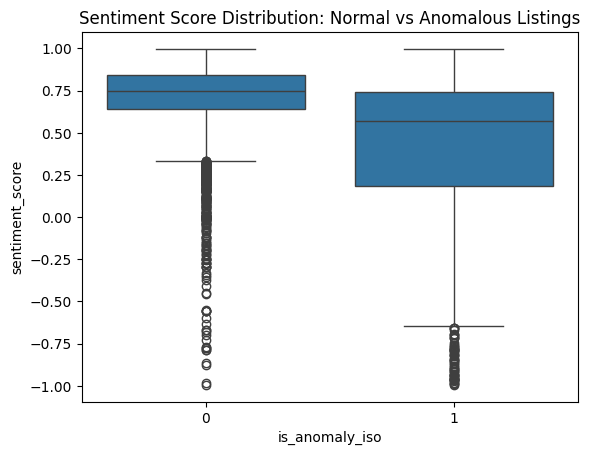

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='is_anomaly_iso', y='sentiment_score', data=listings_df)
plt.title("Sentiment Score Distribution: Normal vs Anomalous Listings")
plt.show()

# 4. Add Suspicious Behavior Flags

### High-Price Outliers (above 2x median price)

In [ ]:
# Flag listings with unusually high price
price_threshold = listings_df['price'].median() * 2
listings_df['suspicious_price'] = listings_df['price'] > price_threshold

### Low Availability (less than 30 days/year)

In [ ]:
# Flag listings that are rarely available
listings_df['suspicious_availability'] = listings_df['availability_365'] < 30

### Very Low Review Count (less than 3 reviews)

In [ ]:
# Flag listings with too few reviews (possible fake or new)
listings_df['suspicious_review_count'] = listings_df['number_of_reviews'].fillna(0) < 3

In [ ]:
# Convert boolean to 0/1 for later calculations
listings_df['suspicious_price'] = listings_df['suspicious_price'].astype(int)
listings_df['suspicious_availability'] = listings_df['suspicious_availability'].astype(int)
listings_df['suspicious_review_count'] = listings_df['suspicious_review_count'].astype(int)

### Fraud Columns for First 10 Listings

In [ ]:
summary_cols = [
    'id', 'price', 'availability_365', 'number_of_reviews',
    'is_anomaly_iso', 'sentiment_score',
    'suspicious_price', 'suspicious_availability', 'suspicious_review_count'
]

display(listings_df[summary_cols].head(10))

,id,price,availability_365,number_of_reviews,is_anomaly_iso,sentiment_score,suspicious_price,suspicious_availability,suspicious_review_count
0,36121,200.0,362,9,0,0.948467,0,0,0
1,36647,82.0,204,102,0,0.606021,0,0,0
2,38663,765.0,326,43,0,0.867205,1,0,0
3,38833,139.0,25,241,0,0.807893,0,1,0
4,39282,130.0,38,274,0,0.838016,0,0,0
5,39572,139.0,365,44,0,0.690025,0,0,0
6,6848,96.0,173,194,0,0.763309,0,0,0
7,6872,59.0,83,1,0,0.981700,0,0,1
8,6990,67.0,264,251,0,0.853437,0,0,0
9,7097,195.0,190,398,0,0.843581,0,0,0


### Count of Listings Flagged by Each Rule

In [ ]:
print("Suspicious Price Listings:", listings_df['suspicious_price'].sum())
print("Suspicious Availability Listings:", listings_df['suspicious_availability'].sum())
print("Very Low Review Count Listings:", listings_df['suspicious_review_count'].sum())
print("Anomalies by Isolation Forest:", listings_df['is_anomaly_iso'].sum())
print("Total Listings:", len(listings_df))


Suspicious Price Listings: 4352
Suspicious Availability Listings: 621
Very Low Review Count Listings: 9547
Anomalies by Isolation Forest: 774
Total Listings: 22308


### Listings with Multiple Flags

In [ ]:
# Sum all flags per listing
listings_df['total_flags'] = listings_df[['is_anomaly_iso', 'suspicious_price', 'suspicious_availability', 'suspicious_review_count']].sum(axis=1)

# Show listings with 3 or more fraud indicators
high_risk = listings_df[listings_df['total_flags'] >= 3]
print("Listings with 3+ suspicious indicators:", high_risk.shape[0])
display(high_risk[summary_cols].head(5))

Listings with 3+ suspicious indicators: 320


,id,price,availability_365,number_of_reviews,is_anomaly_iso,sentiment_score,suspicious_price,suspicious_availability,suspicious_review_count
849,2999527,600.0,0,2,0,0.98735,1,1,1
2136,13276930,105.0,29,1,1,-0.29600,0,1,1
2259,14213699,329.0,329,1,1,0.83540,1,0,1
3403,23538486,348.0,1,1,1,0.98250,1,1,1
3490,24535218,388.0,306,1,1,-0.10270,1,0,1


# 5. Trust Score

In [ ]:
# Normalize sentiment from [-1, 1] → [0, 1]
listings_df['normalized_sentiment'] = (listings_df['sentiment_score'] + 1) / 2

# Calculate trust score
listings_df['trust_score'] = (
    1
    - 0.4 * listings_df['is_anomaly_iso']
    - 0.2 * listings_df['suspicious_price']
    - 0.2 * listings_df['suspicious_availability']
    - 0.1 * listings_df['suspicious_review_count']
    + 0.1 * listings_df['normalized_sentiment']
)

# Ensure trust_score is clipped between 0 and 1
listings_df['trust_score'] = listings_df['trust_score'].clip(0, 1)

### Print Top 10 Least Trustworthy Listings

,id,price,trust_score,is_anomaly_iso,suspicious_price,suspicious_availability,suspicious_review_count,sentiment_score
13511,869078428809938880,312.0,0.104970,1,1,1,1,-0.9006
10302,669975637538940388,491.0,0.126990,1,1,1,1,-0.4602
4089,30392806,396.0,0.150000,1,1,1,1,0.0000
13547,869113519668634826,468.0,0.161910,1,1,1,1,0.2382
4880,36404684,361.0,0.165670,1,1,1,1,0.3134
4858,36315828,367.0,0.170095,1,1,1,1,0.4019
13531,869112668142050508,374.0,0.177870,1,1,1,1,0.5574
19627,1228209041418823286,431.0,0.182940,1,1,1,1,0.6588
14100,905023548703341313,402.0,0.182940,1,1,1,1,0.6588
19120,1192828515848213902,408.0,0.191780,1,1,1,1,0.8356


### Trust Score Distribution Plot

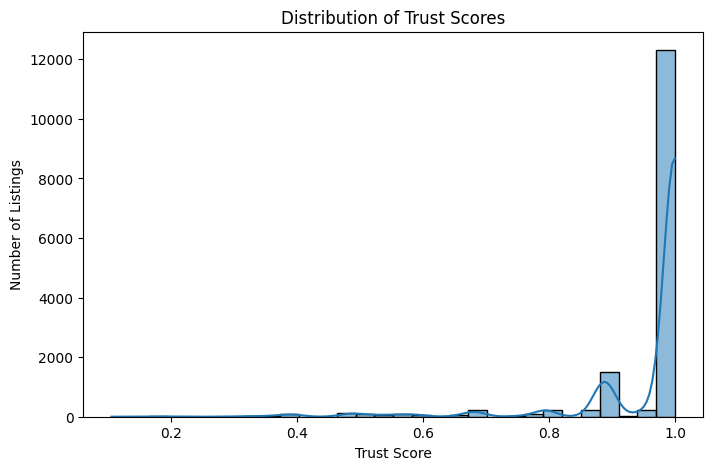

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(listings_df['trust_score'], bins=30, kde=True)
plt.title("Distribution of Trust Scores")
plt.xlabel("Trust Score")
plt.ylabel("Number of Listings")
plt.show()

In [ ]:
listings_df.to_csv("airbnb_listings_with_trust_score.csv", index=False)
low_trust = listings_df[listings_df['trust_score'] < 0.5]
low_trust.to_csv("suspicious_listings_only.csv", index=False)

In [ ]:
# Read the file just written
df_trust = pd.read_csv("airbnb_listings_with_trust_score.csv")
df_suspicious = pd.read_csv("suspicious_listings_only.csv")

# Preview first few rows
print("Preview: Full Listing with Trust Scores")
display(df_trust.head(10))

print("Preview: Suspicious Listings Only (Trust Score < 0.5)")
display(df_suspicious.head(10))


Preview: Full Listing with Trust Scores


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,anomaly_score_iso,is_anomaly_iso,listing_id,sentiment_score,suspicious_price,suspicious_availability,suspicious_review_count,total_flags,normalized_sentiment,trust_score
0,36121,https://www.airbnb.com/rooms/36121,20250301213336,2025-03-03,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,https://a0.muscache.com/pictures/8776354/35b32...,62165,...,1.0,0,36121.0,0.948467,0,0,0,0,0.974233,1.000000
1,36647,https://www.airbnb.com/rooms/36647,20250301213336,2025-03-03,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",https://a0.muscache.com/pictures/miso/Hosting-...,157798,...,1.0,0,36647.0,0.606021,0,0,0,0,0.803010,1.000000
2,38663,https://www.airbnb.com/rooms/38663,20250301213336,2025-03-02,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",https://a0.muscache.com/pictures/miso/Hosting-...,165789,...,1.0,0,38663.0,0.867205,1,0,0,1,0.933602,0.893360
3,38833,https://www.airbnb.com/rooms/38833,20250301213336,2025-03-03,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,https://a0.muscache.com/pictures/7554f9e5-4ab0...,166532,...,1.0,0,38833.0,0.807893,0,1,0,1,0.903947,0.890395
4,39282,https://www.airbnb.com/rooms/39282,20250301213336,2025-03-02,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,https://a0.muscache.com/pictures/ef8f43ad-d967...,168525,...,1.0,0,39282.0,0.838016,0,0,0,0,0.919008,1.000000
5,39572,https://www.airbnb.com/rooms/39572,20250301213336,2025-03-02,city scrape,1 br in a 2 br apt (Midtown West),NaN,None provided,https://a0.muscache.com/pictures/fd1bffd9-ccf8...,169927,...,NaN,0,39572.0,0.690025,0,0,0,0,0.845012,1.000000
6,6848,https://www.airbnb.com/rooms/6848,20250301213336,2025-03-02,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,None provided,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,1.0,0,6848.0,0.763309,0,0,0,0,0.881654,1.000000
7,6872,https://www.airbnb.com/rooms/6872,20250301213336,2025-03-02,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,1.0,0,6872.0,0.981700,0,0,1,1,0.990850,0.999085
8,6990,https://www.airbnb.com/rooms/6990,20250301213336,2025-03-02,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/hosting/Hosti...,16800,...,1.0,0,6990.0,0.853437,0,0,0,0,0.926718,1.000000
9,7097,https://www.airbnb.com/rooms/7097,20250301213336,2025-03-03,city scrape,"Perfect for Your Parents, With Garden & Patio",Parents/grandparents coming to town or are you...,"Residential, village-like atmosphere. Lots of ...",https://a0.muscache.com/pictures/aaac19fc-4b4d...,17571,...,1.0,0,7097.0,0.843581,0,0,0,0,0.921791,1.000000


Preview: Suspicious Listings Only (Trust Score < 0.5)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,anomaly_score_iso,is_anomaly_iso,listing_id,sentiment_score,suspicious_price,suspicious_availability,suspicious_review_count,total_flags,normalized_sentiment,trust_score
0,690934,https://www.airbnb.com/rooms/690934,20250301213336,2025-03-02,city scrape,*Available 1 year* 5BR Multi-Terrace Sunny Apt!,"***1-year sublet available starting Aug 1, 202...",Enjoy why Park Slope has been voted New York C...,https://a0.muscache.com/pictures/f46e6e9c-10a3...,570988,...,-1.0,1,690934.0,0.787913,1,0,0,2,0.893957,0.489396
1,2261367,https://www.airbnb.com/rooms/2261367,20250301213336,2025-03-03,city scrape,brooklyn 14 bedroom gated community,One of a kind in Brooklyn! A huge home it inc...,Sea Gate is a hidden gem. In the summer the o...,https://a0.muscache.com/pictures/5cc30306-6ac0...,10416706,...,-1.0,1,2261367.0,0.867108,1,0,0,2,0.933554,0.493355
2,4469650,https://www.airbnb.com/rooms/4469650,20250301213336,2025-03-02,city scrape,Huge 5BR Townhouse - LEGAL NYC B&B!,Why pay a fortune for a NYC hotel you can bare...,"Harlem is a beautiful, cultural and dynamic ne...",https://a0.muscache.com/pictures/60897884/391e...,23189353,...,-1.0,1,4469650.0,0.731376,1,0,0,2,0.865688,0.486569
3,5353612,https://www.airbnb.com/rooms/5353612,20250301213336,2025-03-02,city scrape,West village unique artistic townhouse apt,2nd floor apt parlor floor overlooks beautiful...,Best neighborhood in NYC. Gold coast. Celebrit...,https://a0.muscache.com/pictures/9cd54017-5395...,9350960,...,-1.0,1,5353612.0,0.868849,1,0,0,2,0.934425,0.493442
4,6000898,https://www.airbnb.com/rooms/6000898,20250301213336,2025-03-02,city scrape,Magnificent Townhouse - Upper East Side - NYC,"This is a very large, spacious, single family,...",The string of museums along Fifth Avenue front...,https://a0.muscache.com/pictures/miso/Hosting-...,23708009,...,-1.0,1,6000898.0,0.781205,1,0,0,2,0.890603,0.489060
5,7654931,https://www.airbnb.com/rooms/7654931,20250301213336,2025-03-02,city scrape,Private Moonlight Room in Brownstone Near Subway,Welcome to our funky and creative rooming hous...,"Bedford-Stuyvesant, or Bedstuy for short, is t...",https://a0.muscache.com/pictures/e32950df-8bca...,40176101,...,-1.0,1,7654931.0,0.730321,0,1,0,2,0.865160,0.486516
6,8054651,https://www.airbnb.com/rooms/8054651,20250301213336,2025-03-02,city scrape,Private Sunlight Room in Brownstone Near Subway,Welcome to our funky and creative rooming hous...,"Bedford-Stuyvesant, or Bedstuy for short, is t...",https://a0.muscache.com/pictures/hosting/Hosti...,40176101,...,-1.0,1,8054651.0,0.758727,0,1,0,2,0.879364,0.487936
7,8055582,https://www.airbnb.com/rooms/8055582,20250301213336,2025-03-02,city scrape,Private Autumn Room in Brownstone Near Subway,Welcome to our funky and creative rooming hous...,"Bedford-Stuyvesant, or Bedstuy for short, is t...",https://a0.muscache.com/pictures/hosting/Hosti...,40176101,...,-1.0,1,8055582.0,0.737717,0,1,0,2,0.868858,0.486886
8,8055778,https://www.airbnb.com/rooms/8055778,20250301213336,2025-03-02,city scrape,Classic Elegance in Brownstone Near Subway,Welcome to our funky and creative rooming hous...,"Bedford-Stuyvesant, or Bedstuy for short, is t...",https://a0.muscache.com/pictures/hosting/Hosti...,40176101,...,-1.0,1,8055778.0,0.774127,0,1,0,2,0.887063,0.488706
9,9788114,https://www.airbnb.com/rooms/9788114,20250301213336,2025-03-03,city scrape,The Grand Suite,"NO CLEANING FEE!!! BIG, BEAUTIFUL AND ULTRA PR...","This is the authentic South Bronx, a quiet and...",https://a0.muscache.com/pictures/hosting/Hosti...,785524,...,-1.0,1,9788114.0,0.708058,0,1,0,2,0.854029,0.485403


In [ ]:
from google.colab import files
files.download("airbnb_listings_with_trust_score.csv")
files.download("suspicious_listings_only.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium
from folium.plugins import HeatMap

# Map centered around average location
map_center = [listings_df['latitude'].mean(), listings_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Only low trust
heat_data = listings_df[listings_df['trust_score'] < 0.5][['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data).add_to(m)

m  # shows interactive map in notebook


<ipython-input-45-06df2eb0e07e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trust_bucket', data=listings_df, palette='coolwarm')


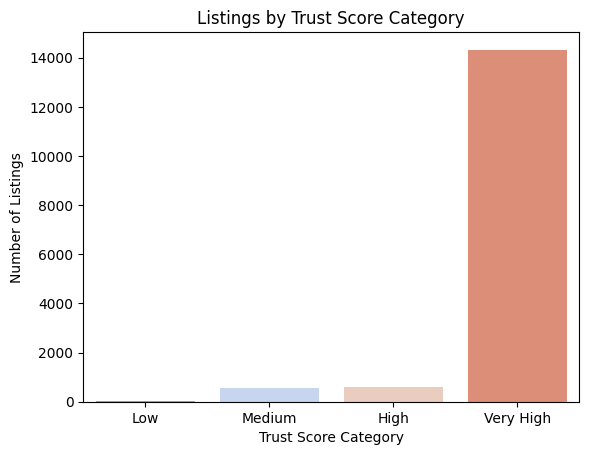

In [ ]:
listings_df['trust_bucket'] = pd.cut(listings_df['trust_score'], bins=[0, 0.3, 0.6, 0.85, 1],
                                     labels=["Low", "Medium", "High", "Very High"])

sns.countplot(x='trust_bucket', data=listings_df, palette='coolwarm')
plt.title("Listings by Trust Score Category")
plt.xlabel("Trust Score Category")
plt.ylabel("Number of Listings")
plt.show()

Listings by Trust Score Category:
trust_bucket
Low             22
Medium         557
High           606
Very High    14325
Name: count, dtype: int64

Number of potentially fraudulent listings (Low Trust): 22

Sample Low Trust Listings:


,id,price,trust_score,is_anomaly_iso,suspicious_price,suspicious_availability,suspicious_review_count
3403,23538486,348.0,0.199125,1,1,1,1
4089,30392806,396.0,0.150000,1,1,1,1
4356,31726939,460.0,0.192900,1,1,1,1
4494,32926087,509.0,0.192145,1,1,1,1
4702,34866682,701.0,0.282365,1,1,1,0


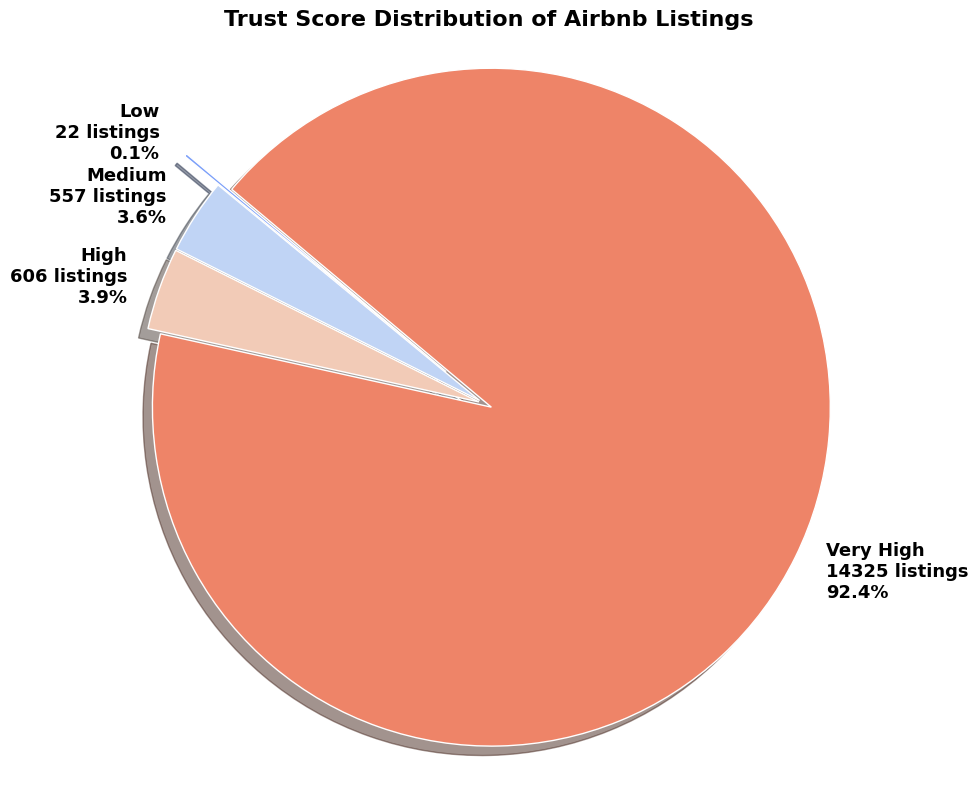

In [ ]:
# Generate labels with percentage and count
total = trust_bucket_counts.sum()
labels = [
    f"{cat}\n{count} listings\n{(count/total)*100:.1f}%"
    for cat, count in trust_bucket_counts.items()
]

# Color and emphasis
colors = sns.color_palette('coolwarm', len(trust_bucket_counts))
explode = [0.15 if label == "Low" else 0.02 for label in trust_bucket_counts.index]

# Plot
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(
    trust_bucket_counts,
    labels=labels,
    explode=explode,
    colors=colors,
    startangle=140,
    textprops={'fontsize': 13, 'weight': 'bold'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    shadow=True
)

plt.title("Trust Score Distribution of Airbnb Listings", fontsize=16, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()